In [1]:
import requests

In [7]:
res = requests.post("http://svecwai.in:8080/predictions/cifar/1.0", files={'data': open('cifar10_test_data/cat.png', 'rb')})

res.json()

{'cat': 0.9743612408638,
 'dog': 0.02537747658789158,
 'frog': 0.00021212399587966502,
 'horse': 3.0037646865821443e-05,
 'bird': 1.2684955436270684e-05}

In [3]:
res = requests.post("http://localhost:8080/explanations/cifar/1.0", files={'data': open('cifar10_test_data/frog.png', 'rb')})

ig = res.json()

In [4]:
ig

[[[-0.00011062224042328317,
   -5.793197208784518e-05,
   -0.0002274858011539228,
   -0.00027032288920783354,
   -4.103879925795089e-05,
   -0.00029574188755172924,
   -0.00048128061757915356,
   -0.0006856622735768736,
   -0.00028380226964407973,
   2.7717064428372724e-05,
   0.0010933943982933073,
   0.0014677181528672109,
   0.001365073388879152,
   0.0009070426683571042,
   0.0009858083943862371,
   0.0010292600134468323,
   0.0008194568312782805,
   -0.0012774537664490832,
   -0.003633071480300257,
   -0.0014442992425494263,
   -0.002001943989449148,
   -0.002862900960292388,
   -0.002966578905509878,
   -0.004952918346357289,
   -0.004806270142516795,
   -0.00010355645578377403,
   0.0007897504086453423,
   0.0005943988375316208,
   0.0007474620733563146,
   -5.1775766432928446e-05,
   0.0008296817493633852,
   0.0005692087725791186,
   0.00029212891059633467,
   0.00033402609581173806,
   0.0007504863304057414,
   0.001412448644254815,
   0.00040588468939446146,
   -0.0002315770

In [5]:
import torch
import numpy as np
import torchvision.transforms as T

from PIL import Image

from captum.attr import visualization as viz

In [6]:
img_path = "cifar10_test_data/dog.png"

inp_image = Image.open(img_path)
to_tensor = T.Compose([
	T.Resize((224,224)),
	T.ToTensor()
])
inp_image = to_tensor(inp_image)

inp_image = inp_image.numpy()
attributions = np.array(ig)

inp_image, attributions = inp_image.transpose(1, 2, 0), attributions.transpose(1, 2, 0)

In [7]:
inp_image.shape, attributions.shape

((224, 224, 3), (224, 224, 3))

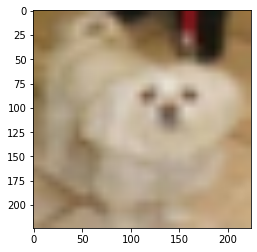

In [8]:
import matplotlib.pyplot as plt

plt.imshow(inp_image, cmap="inferno")

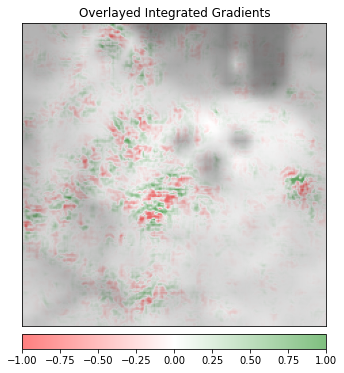

(<Figure size 432x432 with 2 Axes>,
 <AxesSubplot:title={'center':'Overlayed Integrated Gradients'}>)

In [9]:
viz.visualize_image_attr(attributions, inp_image, method="blended_heat_map",sign="all", show_colorbar=True, title="Overlayed Integrated Gradients")